### パッケージの準備とデータの取得

In [1]:
import pyam
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
fontprop = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/msgothic.ttc")

<IPython.core.display.Javascript object>

In [2]:
scenario_list = ['Below 2°C',
                 'Nationally Determined Contributions (NDCs)',
                 'Delayed transition',
                 'Divergent Net Zero',
                 'Current Policies',
                 'Net Zero 2050']

df = pyam.read_iiasa(
    'ngfs_phase_3',
    model=['NiGEM NGFS v1.22 \[REMIND-MAgPIE 3.0-4.4\]',
           'REMIND-MAgPIE 3.0-4.4'],
    variable=['NiGEM|Equity prices|Combined', 
              'NiGEM|Exchange rate; domestic per US$|Combined',
              'NiGEM|Exchange rate; local currency per US$|Combined',
              'NiGEM|Gross Domestic Product (GDP)|Combined',
              'NiGEM|Inflation rate; %|Combined',
              'NiGEM|Long term interest rate; %|Combined',
              'NiGEM|Long term real interest rate; %|Combined',
              'Emissions|CO2', 
              'Price|Carbon'],    
    region=['NiGEM NGFS v1.22|World', 'NiGEM NGFS v1.22|Japan', 'NiGEM NGFS v1.22|United States', 'World', 'Japan', 'United States'],
    scenario=scenario_list
)

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.iiasa - INFO: You are connected to the IXSE_NGFS_PHASE_3 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


### (図3) 全世界のCO2排出量(左)と炭素価格(右) 

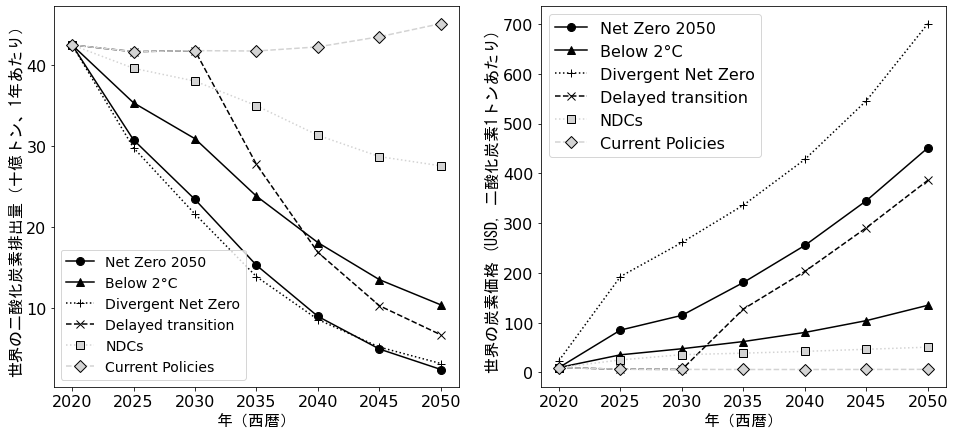

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 7))

df_ts = df.filter(variable='Emissions|CO2', region='World', year=range(2020, 2051)).timeseries()
df_ts = df_ts.reset_index()
df_ts = df_ts.set_index('scenario')
df_ts = df_ts.drop(columns=['model', 'region', 'variable', 'unit'])
df_ts = df_ts.transpose()
df_ts = 0.001 * df_ts

ax[0] = df_ts.plot(y = 'Net Zero 2050',
                color='black', marker='o', markersize = 8, linestyle = "-", ax = ax[0])
ax[0] = df_ts.plot(y = 'Below 2°C', 
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax[0])
ax[0] = df_ts.plot(y = 'Divergent Net Zero',
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax[0])
ax[0] = df_ts.plot(y = 'Delayed transition',
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax[0])
ax[0] = df_ts.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax[0])
ax[0] = df_ts.plot(y = 'Current Policies',
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 10.5)), ax = ax[0])
ax[0].tick_params(labelsize=16)
ax[0].set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[0].set_ylabel('世界の二酸化炭素排出量（十億トン、1年あたり）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[0].legend(fontsize = 14)

df_ts = df.filter(variable='Price|Carbon', region='World', year=range(2020, 2051)).timeseries()
df_ts = df_ts.reset_index()
df_ts = df_ts.set_index('scenario')
df_ts = df_ts.drop(columns=['model', 'region', 'variable', 'unit'])
df_ts = df_ts.transpose()

ax[1] = df_ts.plot(y = 'Net Zero 2050',
                color='black', marker='o', markersize = 8, linestyle = "-", ax = ax[1])
ax[1] = df_ts.plot(y = 'Below 2°C', 
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax[1])
ax[1] = df_ts.plot(y = 'Divergent Net Zero',
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax[1])
ax[1] = df_ts.plot(y = 'Delayed transition',
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax[1])
ax[1] = df_ts.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax[1])
ax[1] = df_ts.plot(y = 'Current Policies',
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 10.5)), ax = ax[1])
ax[1].tick_params(labelsize=16)
ax[1].set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[1].set_ylabel('世界の炭素価格 (USD, 二酸化炭素1トンあたり) ', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[1].legend(fontsize = 16)

plt.savefig('fig03_emission_carbon_price.png', bbox_inches="tight")

### (図4) 日本の実質GDP(左)とインフレ率(右)

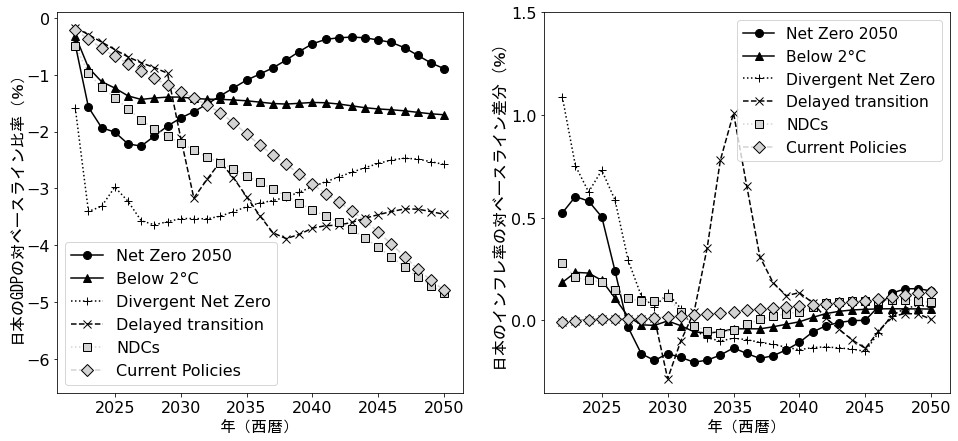

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 7))

df_ts = df.filter(variable='NiGEM|Gross Domestic Product (GDP)|Combined', region='NiGEM NGFS v1.22|Japan', year=range(2020, 2051)).timeseries()
df_ts = df_ts.reset_index()
df_ts = df_ts.set_index('scenario')
df_ts = df_ts.drop(columns=['model', 'region', 'variable', 'unit'])
df_ts = df_ts.transpose()

ax[0] = df_ts.plot(y = 'Net Zero 2050', label="Net Zero 2050",
                color='black', marker='o', markersize = 8, linestyle = "-", ax = ax[0])
ax[0] = df_ts.plot(y = 'Below 2°C', label="Below 2°C",
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax[0])
ax[0] = df_ts.plot(y = 'Divergent Net Zero', label="Divergent Net Zero",
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax[0])
ax[0] = df_ts.plot(y = 'Delayed transition', label="Delayed transition",
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax[0])
ax[0] = df_ts.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax[0])
ax[0] = df_ts.plot(y = 'Current Policies', label="Current Policies",
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 10.5)), ax = ax[0])
ax[0].tick_params(labelsize=16)
ax[0].set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[0].set_ylim(-6.6, 0.1)
ax[0].set_ylabel('日本のGDPの対ベースライン比率（％）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[0].legend(fontsize = 16)

df_ts = df.filter(variable='NiGEM|Inflation rate; %|Combined', region='NiGEM NGFS v1.22|Japan', year=range(2020, 2051)).timeseries()
df_ts = df_ts.reset_index()
df_ts = df_ts.set_index('scenario')
df_ts = df_ts.drop(columns=['model', 'region', 'variable', 'unit'])
df_ts = df_ts.transpose()

ax[1] = df_ts.plot(y = 'Net Zero 2050', label="Net Zero 2050",
                color='black', marker='o', markersize = 8, linestyle = "-", ax = ax[1])
ax[1] = df_ts.plot(y = 'Below 2°C', label="Below 2°C",
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax[1])
ax[1] = df_ts.plot(y = 'Divergent Net Zero', label="Divergent Net Zero",
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax[1])
ax[1] = df_ts.plot(y = 'Delayed transition', label="Delayed transition",
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax[1])
ax[1] = df_ts.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax[1])
ax[1] = df_ts.plot(y = 'Current Policies', label="Current Policies",
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 10.5)), ax = ax[1])
ax[1].tick_params(labelsize=16)
ax[1].set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[1].set_yticks([0, 0.5, 1.0, 1.5])
ax[1].set_ylabel('日本のインフレ率の対ベースライン差分 (％) ', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[1].legend(fontsize = 15.5)

plt.savefig('fig04_jp_gdp_inflation.png', bbox_inches="tight")

### (図5) 日本(左)と米国(右)の長期金利

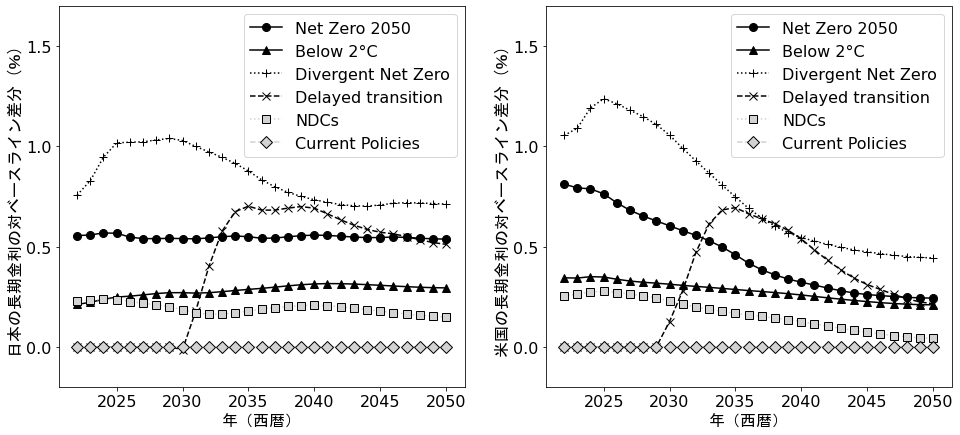

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 7))

df_ts = df.filter(variable='NiGEM|Long term interest rate; %|Combined', region='NiGEM NGFS v1.22|Japan', year=range(2020, 2051)).timeseries()
df_ts = df_ts.reset_index()
df_ts = df_ts.set_index('scenario')
df_ts = df_ts.drop(columns=['model', 'region', 'variable', 'unit'])
df_ts = df_ts.transpose()

ax[0] = df_ts.plot(y = 'Net Zero 2050', label="Net Zero 2050",
                color='black', marker='o', markersize = 8, linestyle = "-", ax = ax[0])
ax[0] = df_ts.plot(y = 'Below 2°C', label="Below 2°C",
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax[0])
ax[0] = df_ts.plot(y = 'Divergent Net Zero', label="Divergent Net Zero",
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax[0])
ax[0] = df_ts.plot(y = 'Delayed transition', label="Delayed transition",
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax[0])
ax[0] = df_ts.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax[0])
ax[0] = df_ts.plot(y = 'Current Policies', label="Current Policies",
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 10.5)), ax = ax[0])
ax[0].tick_params(labelsize=16)
ax[0].set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[0].set_yticks([0, 0.5, 1.0, 1.5])
ax[0].set_ylim(-0.2, 1.7)
ax[0].set_ylabel('日本の長期金利の対ベースライン差分 (％) ', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[0].legend(fontsize = 16)

df_ts = df.filter(variable='NiGEM|Long term interest rate; %|Combined', region='NiGEM NGFS v1.22|United States', year=range(2020, 2051)).timeseries()
df_ts = df_ts.reset_index()
df_ts = df_ts.set_index('scenario')
df_ts = df_ts.drop(columns=['model', 'region', 'variable', 'unit'])
df_ts = df_ts.transpose()

ax[1] = df_ts.plot(y = 'Net Zero 2050', label="Net Zero 2050",
                color='black', marker='o', markersize = 8, linestyle = "-", ax = ax[1])
ax[1] = df_ts.plot(y = 'Below 2°C', label="Below 2°C",
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax[1])
ax[1] = df_ts.plot(y = 'Divergent Net Zero', label="Divergent Net Zero",
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax[1])
ax[1] = df_ts.plot(y = 'Delayed transition', label="Delayed transition",
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax[1])
ax[1] = df_ts.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax[1])
ax[1] = df_ts.plot(y = 'Current Policies', label="Current Policies",
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 10.5)), ax = ax[1])
ax[1].tick_params(labelsize=16)
ax[1].set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[1].set_yticks([0, 0.5, 1.0, 1.5])
ax[1].set_ylim(-0.2, 1.7)
ax[1].set_ylabel('米国の長期金利の対ベースライン差分 (％) ', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[1].legend(fontsize = 16, loc='upper right')

plt.savefig('fig05_interest_rate.png', bbox_inches="tight")

### (図6) 日本(左)と米国(右)の株価

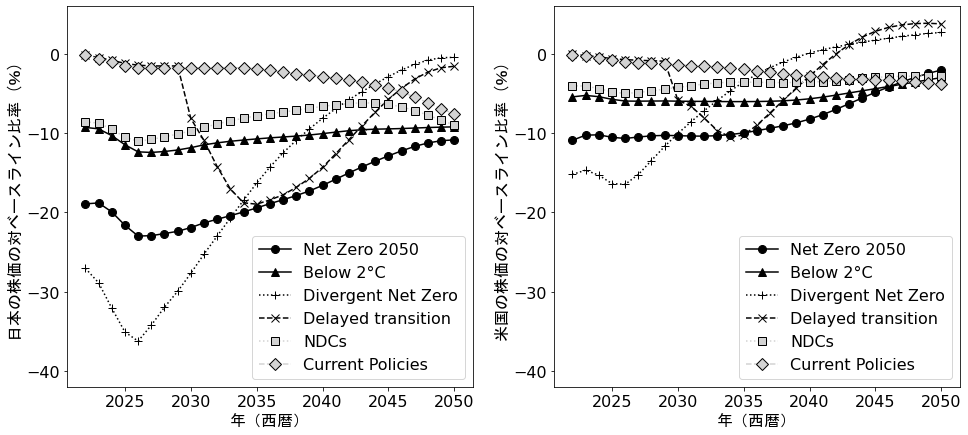

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 7))

df_ts = df.filter(variable='NiGEM|Equity prices|Combined', region='NiGEM NGFS v1.22|Japan', year=range(2020, 2051)).timeseries()
df_ts = df_ts.reset_index()
df_ts = df_ts.set_index('scenario')
df_ts = df_ts.drop(columns=['model', 'region', 'variable', 'unit'])
df_ts = df_ts.transpose()

ax[0] = df_ts.plot(y = 'Net Zero 2050', label="Net Zero 2050",
                color='black', marker='o', markersize = 8, linestyle = "-", ax = ax[0])
ax[0] = df_ts.plot(y = 'Below 2°C', label="Below 2°C",
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax[0])
ax[0] = df_ts.plot(y = 'Divergent Net Zero', label="Divergent Net Zero",
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax[0])
ax[0] = df_ts.plot(y = 'Delayed transition', label="Delayed transition",
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax[0])
ax[0] = df_ts.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax[0])
ax[0] = df_ts.plot(y = 'Current Policies', label="Current Policies",
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 10.5)), ax = ax[0])
ax[0].tick_params(labelsize=16)
ax[0].set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[0].set_ylim(-42, 6)
ax[0].set_ylabel('日本の株価の対ベースライン比率 (％) ', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[0].legend(fontsize = 16)

df_ts = df.filter(variable='NiGEM|Equity prices|Combined', region='NiGEM NGFS v1.22|United States', year=range(2020, 2051)).timeseries()
df_ts = df_ts.reset_index()
df_ts = df_ts.set_index('scenario')
df_ts = df_ts.drop(columns=['model', 'region', 'variable', 'unit'])
df_ts = df_ts.transpose()

ax[1] = df_ts.plot(y = 'Net Zero 2050', label="Net Zero 2050",
                color='black', marker='o', markersize = 8, linestyle = "-", ax = ax[1])
ax[1] = df_ts.plot(y = 'Below 2°C', label="Below 2°C",
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax[1])
ax[1] = df_ts.plot(y = 'Divergent Net Zero', label="Divergent Net Zero",
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax[1])
ax[1] = df_ts.plot(y = 'Delayed transition', label="Delayed transition",
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax[1])
ax[1] = df_ts.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax[1])
ax[1] = df_ts.plot(y = 'Current Policies', label="Current Policies",
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 10.5)), ax = ax[1])
ax[1].tick_params(labelsize=16)
ax[1].set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[1].set_ylim(-42, 6)
ax[1].set_ylabel('米国の株価の対ベースライン比率 (％) ', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax[1].legend(fontsize = 16, loc='lower right')

plt.savefig('fig06_equity_price.png', bbox_inches="tight")

### ドル円為替

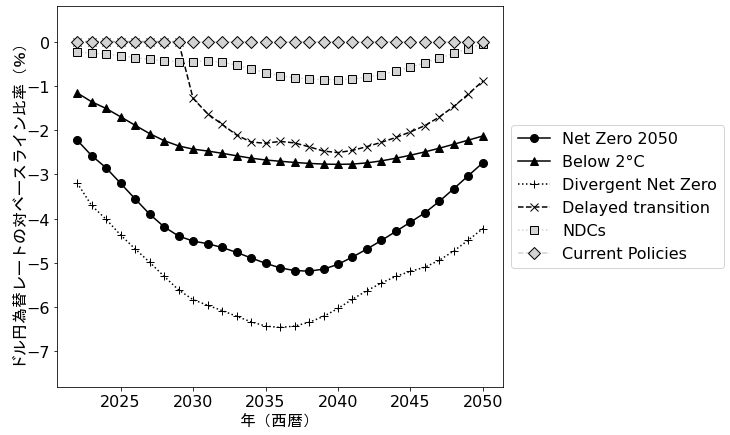

In [7]:
df_ts = df.filter(variable='NiGEM|Exchange rate; local currency per US$|Combined', region='NiGEM NGFS v1.22|Japan', year=range(2020, 2051)).timeseries()
df_ts = df_ts.reset_index()
df_ts = df_ts.set_index('scenario')
df_ts = df_ts.drop(columns=['model', 'region', 'variable', 'unit'])
df_ts = df_ts.transpose()

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax = df_ts.plot(y = 'Net Zero 2050', label="Net Zero 2050",
                color='black', marker='o', markersize = 8, linestyle = "-", ax=ax)
ax = df_ts.plot(y = 'Below 2°C', label="Below 2°C",
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax)
ax = df_ts.plot(y = 'Divergent Net Zero', label="Divergent Net Zero",
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax)
ax = df_ts.plot(y = 'Delayed transition', label="Delayed transition",
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax)
ax = df_ts.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax)
df_ts.plot(y = 'Current Policies', label="Current Policies",
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 0.5)), ax = ax)
ax.tick_params(labelsize=16)
ax.set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax.set_ylim(-7.8, 0.8)
ax.set_ylabel('ドル円為替レートの対ベースライン比率（％）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax.legend(fontsize = 16, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.savefig('usdjpy.png', bbox_inches="tight")

### 試算準備

In [8]:
df_japan_ir = df.filter(variable='NiGEM|Long term interest rate; %|Combined', 
                        region='NiGEM NGFS v1.22|Japan', year=range(2020, 2051)).timeseries()
df_japan_ir = df_japan_ir.reset_index()
df_japan_ir = df_japan_ir.set_index('scenario')
df_japan_ir = df_japan_ir.drop(columns=['model', 'region', 'variable', 'unit'])
df_japan_ir = df_japan_ir.transpose()

df_us_ir = df.filter(variable='NiGEM|Long term interest rate; %|Combined', 
                     region='NiGEM NGFS v1.22|United States', year=range(2020, 2051)).timeseries()
df_us_ir = df_us_ir.reset_index()
df_us_ir = df_us_ir.set_index('scenario')
df_us_ir = df_us_ir.drop(columns=['model', 'region', 'variable', 'unit'])
df_us_ir = df_us_ir.transpose()

df_japan_equity = df.filter(variable='NiGEM|Equity prices|Combined', 
                            region='NiGEM NGFS v1.22|Japan', year=range(2020, 2051)).timeseries()
df_japan_equity = df_japan_equity.reset_index()
df_japan_equity = df_japan_equity.set_index('scenario')
df_japan_equity = df_japan_equity.drop(columns=['model', 'region', 'variable', 'unit'])
df_japan_equity = df_japan_equity.transpose()

df_us_equity = df.filter(variable='NiGEM|Equity prices|Combined', 
                         region='NiGEM NGFS v1.22|United States', year=range(2020, 2051)).timeseries()
df_us_equity = df_us_equity.reset_index()
df_us_equity = df_us_equity.set_index('scenario')
df_us_equity = df_us_equity.drop(columns=['model', 'region', 'variable', 'unit'])
df_us_equity = df_us_equity.transpose()

df_fx = df.filter(variable='NiGEM|Exchange rate; local currency per US$|Combined', 
                  region='NiGEM NGFS v1.22|Japan', year=range(2020, 2051)).timeseries()
df_fx = df_fx.reset_index()
df_fx = df_fx.set_index('scenario')
df_fx = df_fx.drop(columns=['model', 'region', 'variable', 'unit'])
df_fx = df_fx.transpose()

In [9]:
japan_bond = 197.6
japan_loan = 29.2
japan_equity = 24.3
foreign_bond = 84.2
foreign_equity = 5.8
policy_reserve = 338.7

### (図8) 気候変動のサープラスへの影響

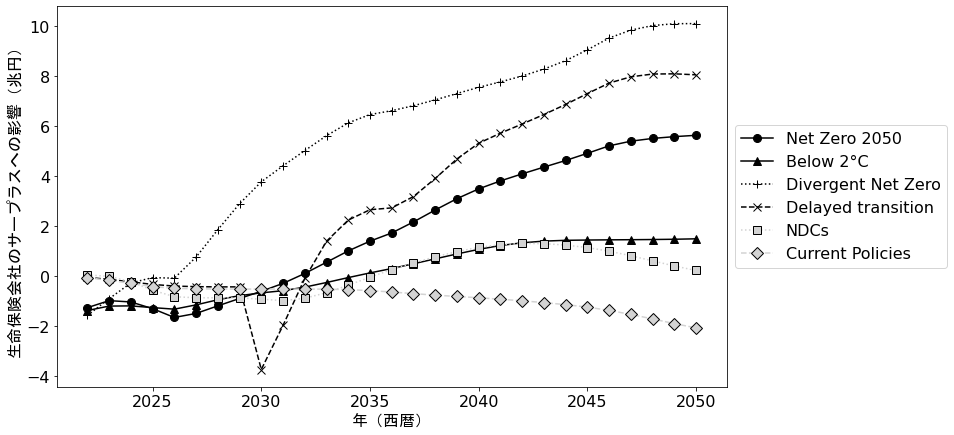

In [10]:
df_impact = japan_bond * 15 * (- df_japan_ir * 0.01) \
            + japan_loan * 5 * (- df_japan_ir * 0.01) \
            - policy_reserve * 15 * (- df_japan_ir * 0.01) \
            + japan_equity * (df_japan_equity / 100) \
            + foreign_bond * 10 * (- df_us_ir * 0.01) \
            + foreign_equity * ((1 + df_us_equity / 100) * (1 + df_fx / 100) - 1)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = df_impact.plot(y = 'Net Zero 2050', label="Net Zero 2050",
                color='black', marker='o', markersize = 8, linestyle = "-", ax=ax)
ax = df_impact.plot(y = 'Below 2°C', label="Below 2°C",
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax)
ax = df_impact.plot(y = 'Divergent Net Zero', label="Divergent Net Zero",
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax)
ax = df_impact.plot(y = 'Delayed transition', label="Delayed transition",
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax)
ax = df_impact.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax)
df_impact.plot(y = 'Current Policies', label="Current Policies",
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 0.5)), ax = ax)
ax.tick_params(labelsize=16)
ax.set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax.set_ylabel('生命保険会社のサープラスへの影響（兆円）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax.legend(fontsize = 16, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.savefig('fig08_surplus.png', bbox_inches="tight")

### (図9) 気候変動の総資産への影響

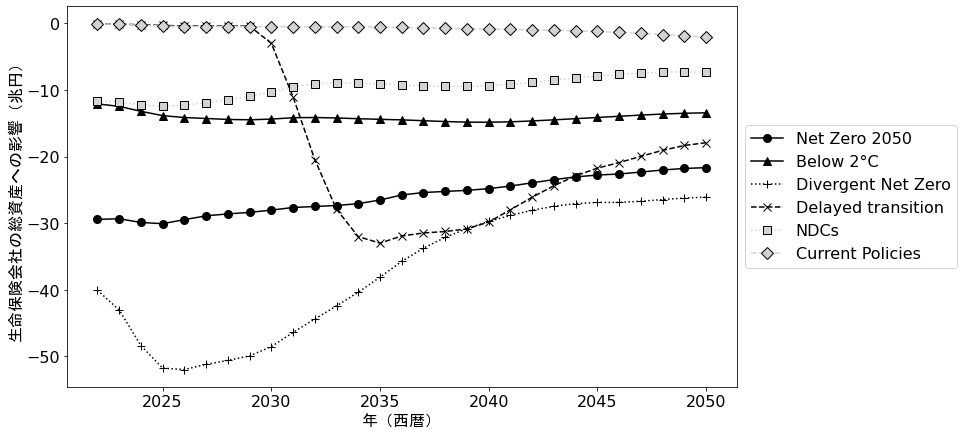

In [11]:
df_impact = japan_bond * 15 * (- df_japan_ir * 0.01) \
            + japan_loan * 5 * (- df_japan_ir * 0.01) \
            + japan_equity * (df_japan_equity / 100) \
            + foreign_bond * 10 * (- df_us_ir * 0.01) \
            + foreign_equity * ((1 + df_us_equity / 100) * (1 + df_fx / 100) - 1)

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax = df_impact.plot(y = 'Net Zero 2050', label="Net Zero 2050",
                color='black', marker='o', markersize = 8, linestyle = "-", ax=ax)
ax = df_impact.plot(y = 'Below 2°C', label="Below 2°C",
                color='black', marker="^", markersize = 8, linestyle = "-", ax = ax)
ax = df_impact.plot(y = 'Divergent Net Zero', label="Divergent Net Zero",
                color='black', marker='+', markersize = 8, linestyle = ":", ax = ax)
ax = df_impact.plot(y = 'Delayed transition', label="Delayed transition",
                color='black', marker="x", markersize = 8, linestyle = "--", ax = ax)
ax = df_impact.plot(y = 'Nationally Determined Contributions (NDCs)', label="NDCs",
                color='lightgray', marker='s', markersize = 8, linestyle = ":", markeredgecolor='black', ax = ax)
df_impact.plot(y = 'Current Policies', label="Current Policies",
                color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black',
                legend=dict(loc='lower left', bbox_to_anchor=(1.0, 0.5)), ax = ax)
ax.tick_params(labelsize=16)
ax.set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax.set_ylabel('生命保険会社の総資産への影響（兆円）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax.legend(fontsize = 16, loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.savefig('fig09_total_asset.png', bbox_inches="tight")

### (図10) Net Zero 2050シナリオのサープラス影響の要因分解

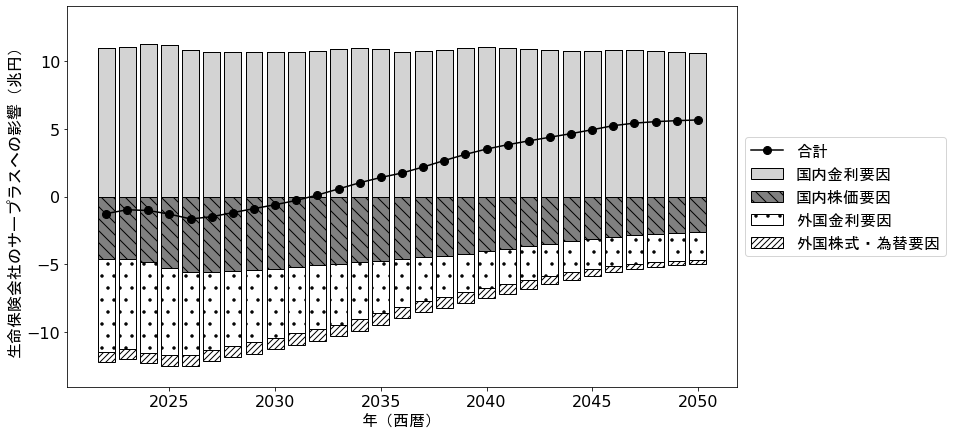

In [12]:
fontprop14 = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/msgothic.ttc", size=16)

df_jp_ir_effect = japan_bond * 15 * (- df_japan_ir * 0.01) + japan_loan * 5 * (- df_japan_ir * 0.01) - policy_reserve * 15 * (- df_japan_ir * 0.01)
df_jp_equity_effect = japan_equity * (df_japan_equity / 100)
df_us_ir_effect = foreign_bond * 10 * (- df_us_ir * 0.01)
df_us_equity_effect = foreign_equity * ((1 + df_us_equity / 100) * (1 + df_fx / 100) - 1)

s = "Net Zero 2050"
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(df_jp_ir_effect.index, np.maximum(df_jp_ir_effect[s], 0), 
       color='lightgray', edgecolor='black', label = "国内金利要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_jp_ir_effect[s], 0), 
       color='lightgray', edgecolor='black')

ax.bar(df_jp_ir_effect.index, np.maximum(df_jp_equity_effect[s], 0), 
       bottom = np.maximum(df_jp_ir_effect[s], 0),
       color="gray", edgecolor='black', hatch="\\\\", label = "国内株価要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_jp_equity_effect[s], 0), 
       bottom = np.minimum(df_jp_ir_effect[s], 0), color="gray", edgecolor='black', hatch="\\\\")

ax.bar(df_jp_ir_effect.index, np.maximum(df_us_ir_effect[s], 0),
       bottom = np.maximum(df_jp_ir_effect[s], 0) + np.maximum(df_jp_equity_effect[s], 0),
       color="white", edgecolor='black', hatch=".", label = "外国金利要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_us_ir_effect[s], 0), 
       bottom = np.minimum(df_jp_ir_effect[s], 0) + np.minimum(df_jp_equity_effect[s], 0), 
       color="white", edgecolor='black', hatch=".")

ax.bar(df_jp_ir_effect.index, np.maximum(df_us_equity_effect[s], 0),
       bottom = np.maximum(df_jp_ir_effect[s], 0) + np.maximum(df_jp_equity_effect[s], 0) + np.maximum(df_us_ir_effect[s], 0),
       color="white", edgecolor='black', hatch="////", label = "外国株式・為替要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_us_equity_effect[s], 0), 
       bottom = np.minimum(df_jp_ir_effect[s], 0) + np.minimum(df_jp_equity_effect[s], 0) + np.minimum(df_us_ir_effect[s], 0), 
       color="white", edgecolor='black', hatch="////")

ax.plot(df_jp_ir_effect[s] + df_jp_equity_effect[s] + df_us_ir_effect[s] + df_us_equity_effect[s],
        color='black', marker='o', markersize = 8, linestyle = "-", label = "合計")

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop=fontprop14)
ax.tick_params(labelsize=16)
ax.set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax.set_ylim(-14, 14)
ax.set_ylabel('生命保険会社のサープラスへの影響（兆円）', fontsize = 16, fontdict = {"fontproperties": fontprop})

plt.savefig('fig10_net_zero_2050.png', bbox_inches="tight")
plt.show()

### (図11) Delayed Transitionシナリオのサープラス影響の要因分解

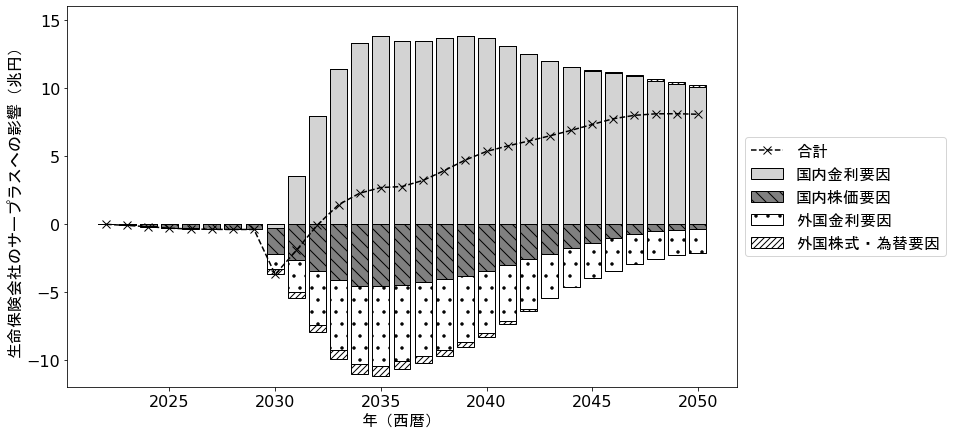

In [13]:
fontprop14 = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/msgothic.ttc", size=16)

df_jp_ir_effect = japan_bond * 15 * (- df_japan_ir * 0.01) + japan_loan * 5 * (- df_japan_ir * 0.01) - policy_reserve * 15 * (- df_japan_ir * 0.01)
df_jp_equity_effect = japan_equity * (df_japan_equity / 100)
df_us_ir_effect = foreign_bond * 10 * (- df_us_ir * 0.01)
df_us_equity_effect = foreign_equity * ((1 + df_us_equity / 100) * (1 + df_fx / 100) - 1)

s = "Delayed transition"
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(df_jp_ir_effect.index, np.maximum(df_jp_ir_effect[s], 0), 
       color='lightgray', edgecolor='black', label = "国内金利要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_jp_ir_effect[s], 0), 
       color='lightgray', edgecolor='black')

ax.bar(df_jp_ir_effect.index, np.maximum(df_jp_equity_effect[s], 0), 
       bottom = np.maximum(df_jp_ir_effect[s], 0),
       color="gray", edgecolor='black', hatch="\\\\", label = "国内株価要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_jp_equity_effect[s], 0), 
       bottom = np.minimum(df_jp_ir_effect[s], 0), color="gray", edgecolor='black', hatch="\\\\")

ax.bar(df_jp_ir_effect.index, np.maximum(df_us_ir_effect[s], 0),
       bottom = np.maximum(df_jp_ir_effect[s], 0) + np.maximum(df_jp_equity_effect[s], 0),
       color="white", edgecolor='black', hatch=".", label = "外国金利要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_us_ir_effect[s], 0), 
       bottom = np.minimum(df_jp_ir_effect[s], 0) + np.minimum(df_jp_equity_effect[s], 0), 
       color="white", edgecolor='black', hatch=".")

ax.bar(df_jp_ir_effect.index, np.maximum(df_us_equity_effect[s], 0),
       bottom = np.maximum(df_jp_ir_effect[s], 0) + np.maximum(df_jp_equity_effect[s], 0) + np.maximum(df_us_ir_effect[s], 0),
       color="white", edgecolor='black', hatch="////", label = "外国株式・為替要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_us_equity_effect[s], 0), 
       bottom = np.minimum(df_jp_ir_effect[s], 0) + np.minimum(df_jp_equity_effect[s], 0) + np.minimum(df_us_ir_effect[s], 0), 
       color="white", edgecolor='black', hatch="////")

ax.plot(df_jp_ir_effect[s] + df_jp_equity_effect[s] + df_us_ir_effect[s] + df_us_equity_effect[s],
        color='black', marker="x", markersize = 8, linestyle = "--", label = "合計")

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop=fontprop14)
ax.tick_params(labelsize=16)
ax.set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax.set_ylim(-12, 16)
ax.set_ylabel('生命保険会社のサープラスへの影響（兆円）', fontsize = 16, fontdict = {"fontproperties": fontprop})

plt.savefig('fig11_delayed_transition.png', bbox_inches="tight")
plt.show()

### (図12) Current Policiesシナリオのサープラス影響の要因分解

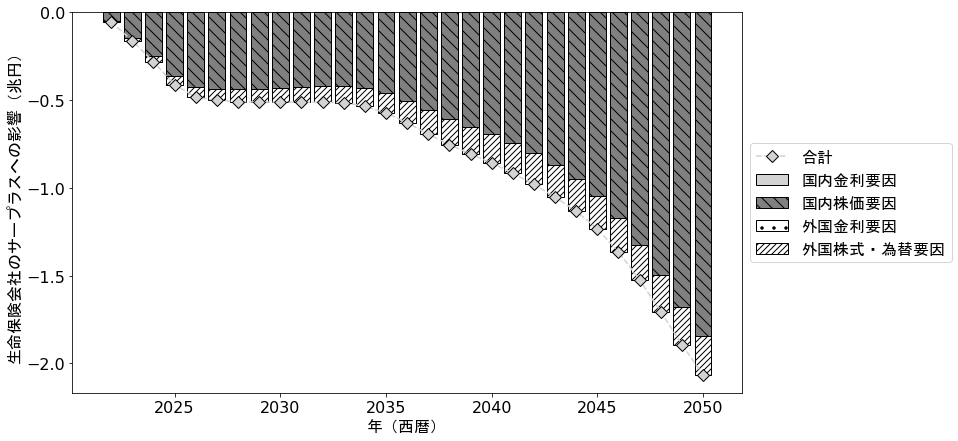

In [14]:
fontprop14 = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/msgothic.ttc", size=16)

df_jp_ir_effect = japan_bond * 15 * (- df_japan_ir * 0.01) + japan_loan * 5 * (- df_japan_ir * 0.01) - policy_reserve * 15 * (- df_japan_ir * 0.01)
df_jp_equity_effect = japan_equity * (df_japan_equity / 100)
df_us_ir_effect = foreign_bond * 10 * (- df_us_ir * 0.01)
df_us_equity_effect = foreign_equity * ((1 + df_us_equity / 100) * (1 + df_fx / 100) - 1)

s = "Current Policies"
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(df_jp_ir_effect.index, np.maximum(df_jp_ir_effect[s], 0), 
       color='lightgray', edgecolor='black', label = "国内金利要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_jp_ir_effect[s], 0), 
       color='lightgray', edgecolor='black')

ax.bar(df_jp_ir_effect.index, np.maximum(df_jp_equity_effect[s], 0), 
       bottom = np.maximum(df_jp_ir_effect[s], 0),
       color="gray", edgecolor='black', hatch="\\\\", label = "国内株価要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_jp_equity_effect[s], 0), 
       bottom = np.minimum(df_jp_ir_effect[s], 0), color="gray", edgecolor='black', hatch="\\\\")

ax.bar(df_jp_ir_effect.index, np.maximum(df_us_ir_effect[s], 0),
       bottom = np.maximum(df_jp_ir_effect[s], 0) + np.maximum(df_jp_equity_effect[s], 0),
       color="white", edgecolor='black', hatch=".", label = "外国金利要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_us_ir_effect[s], 0), 
       bottom = np.minimum(df_jp_ir_effect[s], 0) + np.minimum(df_jp_equity_effect[s], 0), 
       color="white", edgecolor='black', hatch=".")

ax.bar(df_jp_ir_effect.index, np.maximum(df_us_equity_effect[s], 0),
       bottom = np.maximum(df_jp_ir_effect[s], 0) + np.maximum(df_jp_equity_effect[s], 0) + np.maximum(df_us_ir_effect[s], 0),
       color="white", edgecolor='black', hatch="////", label = "外国株式・為替要因")
ax.bar(df_jp_ir_effect.index, np.minimum(df_us_equity_effect[s], 0), 
       bottom = np.minimum(df_jp_ir_effect[s], 0) + np.minimum(df_jp_equity_effect[s], 0) + np.minimum(df_us_ir_effect[s], 0), 
       color="white", edgecolor='black', hatch="////")

ax.plot(df_jp_ir_effect[s] + df_jp_equity_effect[s] + df_us_ir_effect[s] + df_us_equity_effect[s],
        color='lightgray', marker='D', markersize = 8, linestyle = "--", markeredgecolor='black', label = "合計")

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop=fontprop14)
ax.tick_params(labelsize=16)
ax.set_xlabel('年（西暦）', fontsize = 16, fontdict = {"fontproperties": fontprop})
ax.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0])
ax.set_ylabel('生命保険会社のサープラスへの影響（兆円）', fontsize = 16, fontdict = {"fontproperties": fontprop})

plt.savefig('fig12_current_policies.png', bbox_inches="tight")
plt.show()